In [1]:
#workshop 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
sb.set()

cols = ['preg', 'plas', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age', 'class']
df = pd.read_csv('/Users/apple/Desktop/my_machine_learning/csv/pima-indians-diabetes.csv', names=cols)
df.head()

,preg,plas,pres,skin,insu,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
bmi      0
pedi     0
age      0
class    0
dtype: int64

In [7]:
df.describe().round(2)

,preg,plas,pres,skin,insu,bmi,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


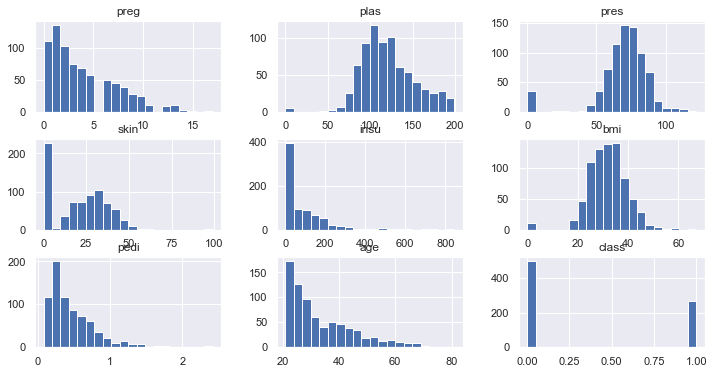

In [8]:
df.hist(bins=20, figsize=(12, 6))
plt.show()

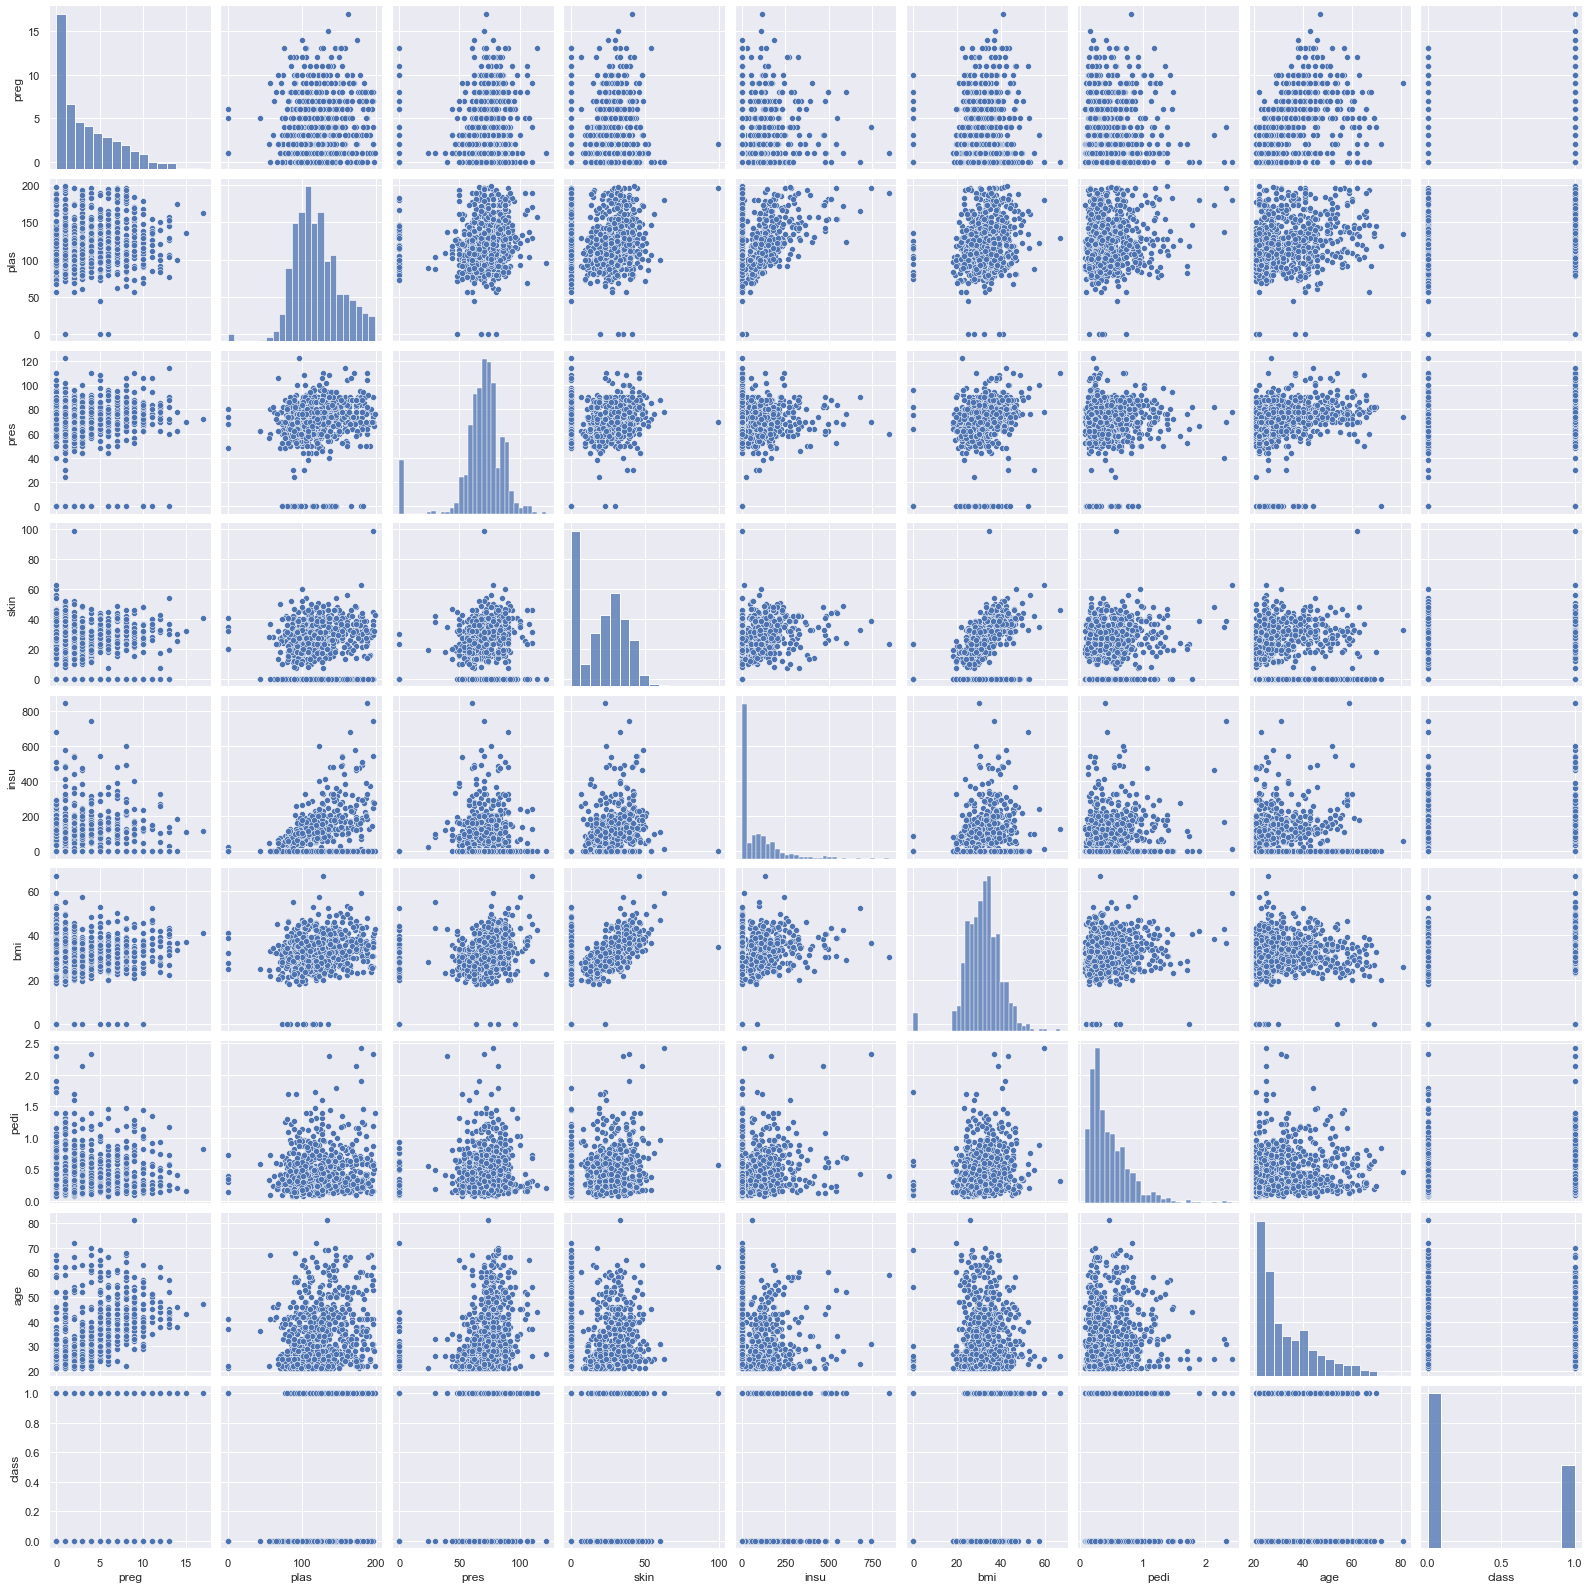

In [9]:
sb.pairplot(df)
plt.show()

/Users/apple/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


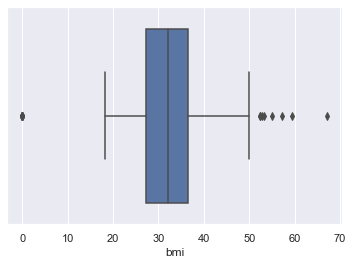

In [10]:
sb.boxplot(df['bmi'])
plt.show()

In [13]:
bmi_zero = df['bmi'][df['bmi'] == 0].count()
bmi_zero

11

In [14]:
print('{:.2f}'.format(bmi_zero / df.shape[0]*100))

1.43


In [16]:
df['bmi'] = df['bmi'].replace(0, df['bmi'].mean())
df.sample(10)

,preg,plas,pres,skin,insu,bmi,pedi,age,class
477,7,114,76,17,110,23.8,0.466,31,0
157,1,109,56,21,135,25.2,0.833,23,0
78,0,131,0,0,0,43.2,0.270,26,1
261,3,141,0,0,0,30.0,0.761,27,1
425,4,184,78,39,277,37.0,0.264,31,1
193,11,135,0,0,0,52.3,0.578,40,1
736,0,126,86,27,120,27.4,0.515,21,0
312,2,155,74,17,96,26.6,0.433,27,1
313,3,113,50,10,85,29.5,0.626,25,0
490,2,83,65,28,66,36.8,0.629,24,0


In [22]:
def chk_zero(cl):
    zero = df[cl][df[cl] == 0].count()
    print('{:5}  {:5}  {:7.2f} %'.format(cl, zero, zero / df.shape[0] * 100))
print('Zero count: \n-----------------------')
for col in df.columns:
    chk_zero(col)

Zero count: 
-----------------------
preg     111    14.45 %
plas       5     0.65 %
pres      35     4.56 %
skin     227    29.56 %
insu     374    48.70 %
bmi        0     0.00 %
pedi       0     0.00 %
age        0     0.00 %
class    500    65.10 %


In [23]:
df.drop('insu', axis=1, inplace=True)

In [24]:
df.describe().round(2)

,preg,plas,pres,skin,bmi,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,32.45,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,6.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,67.10,2.42,81.00,1.00


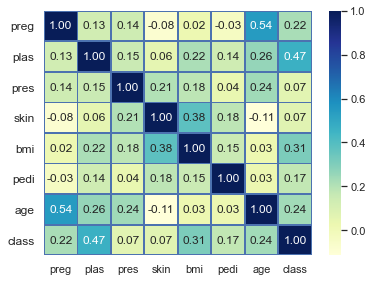

In [27]:
plt.figure(figsize=(6, 4.5))
cor = df.corr()
g = sb.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=0.8, linecolor='b', fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

In [29]:
cols_fts = ['preg', 'plas', 'bmi', 'pedi', 'age']
X = df[cols_fts].copy()
X

,preg,plas,bmi,pedi,age
0,6,148,33.6,0.627,50
1,1,85,26.6,0.351,31
2,8,183,23.3,0.672,32
3,1,89,28.1,0.167,21
4,0,137,43.1,2.288,33
...,...,...,...,...,...
763,10,101,32.9,0.171,63
764,2,122,36.8,0.340,27
765,5,121,26.2,0.245,30
766,1,126,30.1,0.349,47


In [30]:
X['test'] = df['age'] * .7 - df['pedi'] * 9
X.head()

,preg,plas,bmi,pedi,age,test
0,6,148,33.6,0.627,50,29.357
1,1,85,26.6,0.351,31,18.541
2,8,183,23.3,0.672,32,16.352
3,1,89,28.1,0.167,21,13.197
4,0,137,43.1,2.288,33,2.508


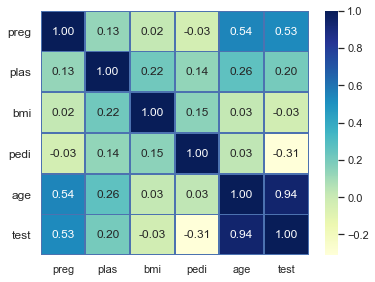

In [31]:
plt.figure(figsize=(6, 4.5))
cor = X.corr()
g = sb.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=0.8, linecolor='b', fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

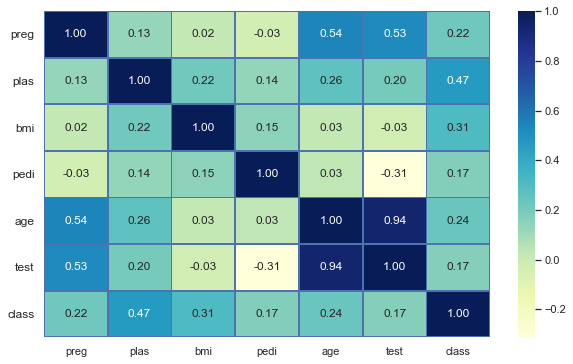

In [34]:
X2 = X.copy()
X2['class'] = df['class']
plt.figure(figsize=(10, 6))
cor = X2.corr()
g = sb.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=0.8, linecolor='b', fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

In [36]:
import warnings

In [37]:
warnings.filterwarnings('ignore')

In [38]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [39]:
X = df.drop('class', axis=1)
sc = Scaler()
X_sc = sc.fit_transform(X)

df_sc = pd.DataFrame(X_sc, columns=X.columns)
df_sc.head().round(3)

,preg,plas,pres,skin,bmi,pedi,age
0,0.353,0.744,0.590,0.354,0.315,0.234,0.483
1,0.059,0.427,0.541,0.293,0.172,0.117,0.167
2,0.471,0.920,0.525,0.000,0.104,0.254,0.183
3,0.059,0.447,0.541,0.232,0.202,0.038,0.000
4,0.000,0.688,0.328,0.354,0.509,0.944,0.200


In [41]:
df_sc.var().sort_values(ascending=False).round(5) * 1000

preg    39.29
age     38.42
skin    25.96
plas    25.81
pres    25.17
pedi    20.01
bmi     19.77
dtype: float64

In [42]:
#workshop 3

In [43]:
df['class'] = df['class'].astype('category')

In [44]:
X = df.drop(['class'], axis=1)
X.head(3)

,preg,plas,pres,skin,bmi,pedi,age
0,6,148,72,35,33.6,0.627,50
1,1,85,66,29,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32


In [45]:
y = df['class']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: category
Categories (2, int64): [0, 1]

In [47]:
import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler as Scaler

In [49]:
sc = Scaler()
X_sc = sc.fit_transform(X)
df_sc = pd.DataFrame(X_sc, columns=X.columns)
df_sc.head()

,preg,plas,pres,skin,bmi,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.314928,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.171779,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.104294,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.202454,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.509202,0.943638,0.200000


In [50]:
from sklearn.feature_selection import SelectKBest, chi2

In [51]:
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X_sc, y)

In [53]:
np.set_printoptions(precision=3)
print(fit.scores_)

[6.56  7.095 0.144 0.536 5.073 2.759 8.206]


In [54]:
features = fit.transform(X_sc)
print(features[0:5,:])

[[0.353 0.744 0.315 0.234 0.483]
 [0.059 0.427 0.172 0.117 0.167]
 [0.471 0.92  0.104 0.254 0.183]
 [0.059 0.447 0.202 0.038 0.   ]
 [0.    0.688 0.509 0.944 0.2  ]]


In [55]:
dfts = pd.DataFrame(fit.scores_, columns=['score'])
dfts['column'] = X.columns
dfts.sort_values(by='score', ascending=False)

,score,column
6,8.205691,age
1,7.094910,plas
0,6.559982,preg
4,5.072897,bmi
5,2.758584,pedi
3,0.536445,skin
2,0.144306,pres


In [56]:
cols_fts = dfts.sort_values(by='score', ascending=False).head(5).column
X_fts = df_sc[cols_fts].copy()
X_fts.shape

(768, 5)

In [57]:
X_fts.columns

Index(['age', 'plas', 'preg', 'bmi', 'pedi'], dtype='object')

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [59]:
model= SVC(kernel='linear')

In [61]:
csv = cross_val_score(model, X_fts, y, cv=10)
print('cross_val_score: {}'.format(csv.round(2)))
print('Average(%): {:.2f}'.format(csv.mean() * 100))

cross_val_score: [0.75 0.79 0.77 0.73 0.75 0.81 0.78 0.79 0.72 0.83]
Average(%): 77.21


In [62]:
#workshop 4

In [63]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

In [64]:
model = LinearSVC()

In [65]:
rfe = RFE(model, 5)
rfe = rfe.fit(X_sc, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True False]
[1 1 1 3 1 1 2]


In [68]:
cols_fts = []
for i,cl in enumerate(X.columns):
    if rfe.support_[i] == True:
        cols_fts.append(cl)
cols_fts

['preg', 'plas', 'pres', 'bmi', 'pedi']

In [69]:
X_fts = df_sc[cols_fts]
X_fts.head()

,preg,plas,pres,bmi,pedi
0,0.352941,0.743719,0.590164,0.314928,0.234415
1,0.058824,0.427136,0.540984,0.171779,0.116567
2,0.470588,0.919598,0.524590,0.104294,0.253629
3,0.058824,0.447236,0.540984,0.202454,0.038002
4,0.000000,0.688442,0.327869,0.509202,0.943638


In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model= SVC(kernel='linear')
csv = cross_val_score(model, X_fts, y, cv=10)
print('cross_val_score: {}'.format(csv.round(2)))
print('Average(%): {:.2f}'.format(csv.mean() * 100))

cross_val_score: [0.73 0.78 0.79 0.74 0.74 0.79 0.79 0.79 0.71 0.83]
Average(%): 76.95


In [71]:
#workshop 5

In [72]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from time import time

In [73]:
df = sb.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
y = df['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()

X_sc = sc.fit_transform(X)

In [79]:
sc_df = pd.DataFrame(X_sc, columns=['SL', 'SW', 'PL', 'PW'])
sc_df.head()

,SL,SW,PL,PW
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [80]:
df.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [81]:
sc_df.describe().round(2)

,SL,SW,PL,PW
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


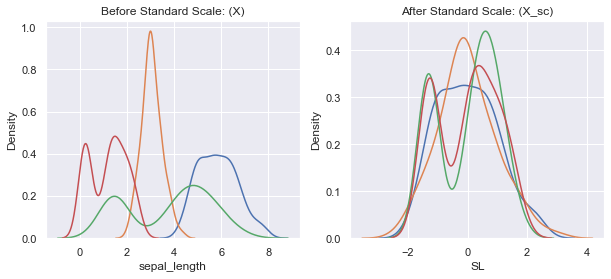

In [83]:
sb.set()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.set_title('Before Standard Scale: (X)')
sb.kdeplot(df['sepal_length'], ax=ax1, label='SL')
sb.kdeplot(df['sepal_width'], ax=ax1, label='SW')
sb.kdeplot(df['petal_length'], ax=ax1, label='PL')
sb.kdeplot(df['petal_width'], ax=ax1, label='PW')

ax2.set_title('After Standard Scale: (X_sc)')
sb.kdeplot(sc_df['SL'], ax=ax2)
sb.kdeplot(sc_df['SW'], ax=ax2)
sb.kdeplot(sc_df['PL'], ax=ax2)
sb.kdeplot(sc_df['PW'], ax=ax2)

plt.show()

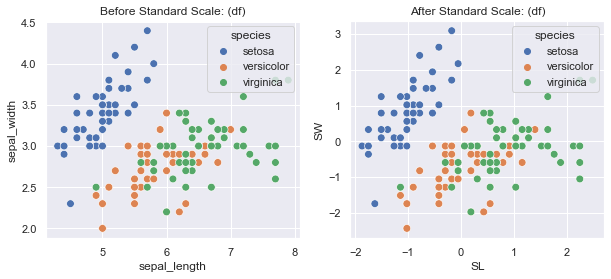

In [86]:
sc_df['species'] = df['species']
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.set_title('Before Standard Scale: (df)')
sb.scatterplot('sepal_length', 'sepal_width', data=df, hue='species', ax=ax1, s=60)

ax2.set_title('After Standard Scale: (df)')
sb.scatterplot('SL', 'SW', data=sc_df, hue='species', ax=ax2, s=60)

plt.show()